# Урок 2.  
# Масштабирование признаков.  
# L1- и L2-регуляризация.  
# Стохастический градиентный спуск

На этом уроке мы продолжим исследовать линейные модели,  
узначем, зачем для линейных моделей нужно масштабировать признаки,  
реализуем свою линейную регрессию с регуляризацией  
и усовршенствуем наш алгоритм градиентного спуска, сделав его стохастическим.  
Поехали!

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450,
               800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 
               1, 3, 3, 1, 2]]).T

In [5]:
y = np.array([45, 55, 50, 59, 65, 35, 75, 80, 50, 60])
y.shape

(10,)

# Виды масштабирования признаков

![img/normalization.png](img/normalization.png)

### MinMaxScaler  

$$\large X_{norm} = \frac{X – X_{min}}{X_{max}-X_{min}}$$

In [6]:
X[:,1].min(), X[:,1].max()

(0, 10)

In [7]:
X[:,2].min(), X[:,2].max()

(450, 2000)

In [8]:
X_norm = X.copy()
X_norm = X_norm.astype(np.float64)
X_norm

array([[1.00e+00, 1.00e+00, 5.00e+02, 1.00e+00],
       [1.00e+00, 1.00e+00, 7.00e+02, 1.00e+00],
       [1.00e+00, 2.00e+00, 7.50e+02, 2.00e+00],
       [1.00e+00, 1.00e+00, 6.00e+02, 1.00e+00],
       [1.00e+00, 3.00e+00, 1.45e+03, 2.00e+00],
       [1.00e+00, 0.00e+00, 8.00e+02, 1.00e+00],
       [1.00e+00, 5.00e+00, 1.50e+03, 3.00e+00],
       [1.00e+00, 1.00e+01, 2.00e+03, 3.00e+00],
       [1.00e+00, 1.00e+00, 4.50e+02, 1.00e+00],
       [1.00e+00, 2.00e+00, 1.00e+03, 2.00e+00]])

In [9]:
X_norm[:,1] = (X[:,1] - X[:,1].min()) / (X[:,1].max() - X[:,1].min())
X_norm

array([[1.00e+00, 1.00e-01, 5.00e+02, 1.00e+00],
       [1.00e+00, 1.00e-01, 7.00e+02, 1.00e+00],
       [1.00e+00, 2.00e-01, 7.50e+02, 2.00e+00],
       [1.00e+00, 1.00e-01, 6.00e+02, 1.00e+00],
       [1.00e+00, 3.00e-01, 1.45e+03, 2.00e+00],
       [1.00e+00, 0.00e+00, 8.00e+02, 1.00e+00],
       [1.00e+00, 5.00e-01, 1.50e+03, 3.00e+00],
       [1.00e+00, 1.00e+00, 2.00e+03, 3.00e+00],
       [1.00e+00, 1.00e-01, 4.50e+02, 1.00e+00],
       [1.00e+00, 2.00e-01, 1.00e+03, 2.00e+00]])

In [10]:
X_norm[:,2] = (X[:,2] - X[:,2].min()) / (X[:,2].max() - X[:,2].min())
X_norm

array([[1.        , 0.1       , 0.03225806, 1.        ],
       [1.        , 0.1       , 0.16129032, 1.        ],
       [1.        , 0.2       , 0.19354839, 2.        ],
       [1.        , 0.1       , 0.09677419, 1.        ],
       [1.        , 0.3       , 0.64516129, 2.        ],
       [1.        , 0.        , 0.22580645, 1.        ],
       [1.        , 0.5       , 0.67741935, 3.        ],
       [1.        , 1.        , 1.        , 3.        ],
       [1.        , 0.1       , 0.        , 1.        ],
       [1.        , 0.2       , 0.35483871, 2.        ]])

### Стандартизация  

$$\large X_{norm} = \frac{X – X_{mean}}{std}$$

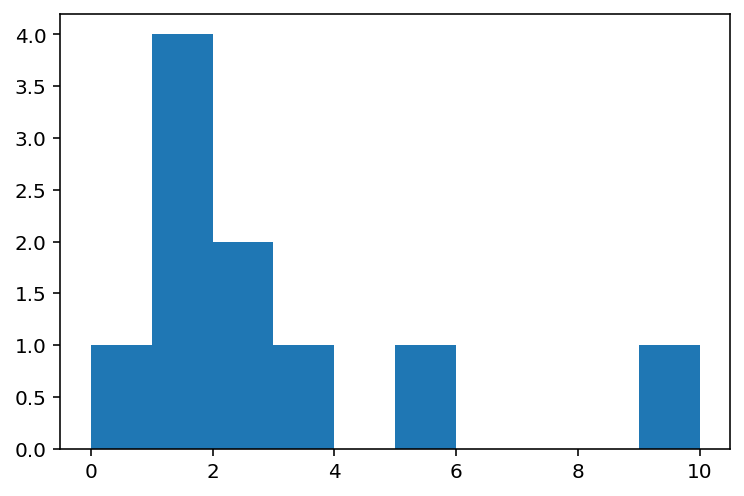

In [11]:
plt.hist(X[:,1]);

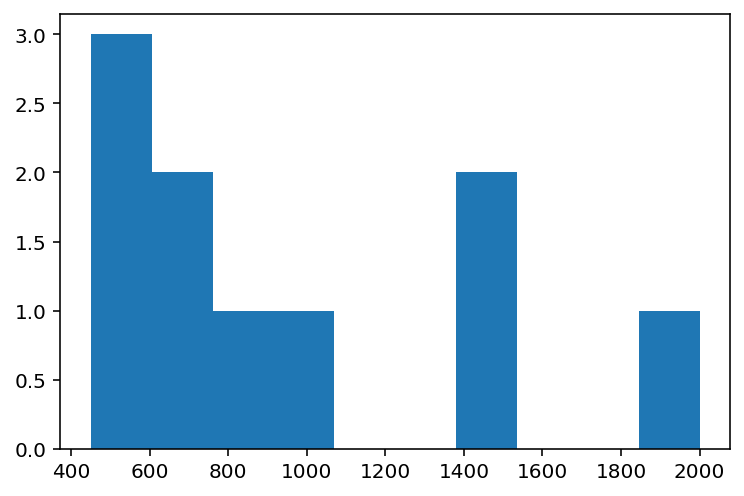

In [12]:
plt.hist(X[:,2]);

In [13]:
X1_mean = X[:,1].mean()
X1_mean

2.6

In [14]:
X1_std = X[:,1].std()
X1_std

2.8000000000000003

In [15]:
X_st = X.copy().astype(np.float64)

In [16]:
X_st[:,1] = (X[:,1] - X1_mean) / X1_std
X_st

array([[ 1.00000000e+00, -5.71428571e-01,  5.00000000e+02,
         1.00000000e+00],
       [ 1.00000000e+00, -5.71428571e-01,  7.00000000e+02,
         1.00000000e+00],
       [ 1.00000000e+00, -2.14285714e-01,  7.50000000e+02,
         2.00000000e+00],
       [ 1.00000000e+00, -5.71428571e-01,  6.00000000e+02,
         1.00000000e+00],
       [ 1.00000000e+00,  1.42857143e-01,  1.45000000e+03,
         2.00000000e+00],
       [ 1.00000000e+00, -9.28571429e-01,  8.00000000e+02,
         1.00000000e+00],
       [ 1.00000000e+00,  8.57142857e-01,  1.50000000e+03,
         3.00000000e+00],
       [ 1.00000000e+00,  2.64285714e+00,  2.00000000e+03,
         3.00000000e+00],
       [ 1.00000000e+00, -5.71428571e-01,  4.50000000e+02,
         1.00000000e+00],
       [ 1.00000000e+00, -2.14285714e-01,  1.00000000e+03,
         2.00000000e+00]])

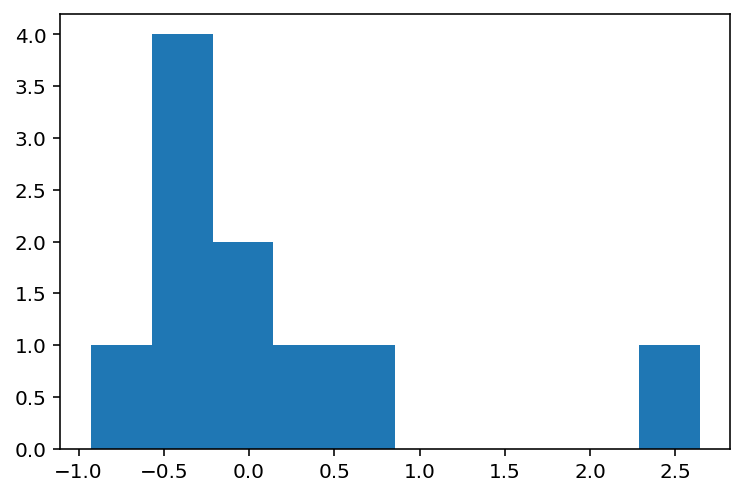

In [17]:
plt.hist(X_st[:,1]);

In [18]:
def custom_StandardScaler(x):
    res = (x - x.mean()) / x.std()
    return res

In [19]:
X_st[:,2] = custom_StandardScaler(X[:,2])

In [20]:
X_st[:,3] = custom_StandardScaler(X[:,3])
X_st

array([[ 1.        , -0.57142857, -0.97958969, -0.89625816],
       [ 1.        , -0.57142857, -0.56713087, -0.89625816],
       [ 1.        , -0.21428571, -0.46401617,  0.38411064],
       [ 1.        , -0.57142857, -0.77336028, -0.89625816],
       [ 1.        ,  0.14285714,  0.97958969,  0.38411064],
       [ 1.        , -0.92857143, -0.36090146, -0.89625816],
       [ 1.        ,  0.85714286,  1.08270439,  1.66447944],
       [ 1.        ,  2.64285714,  2.11385144,  1.66447944],
       [ 1.        , -0.57142857, -1.08270439, -0.89625816],
       [ 1.        , -0.21428571,  0.05155735,  0.38411064]])

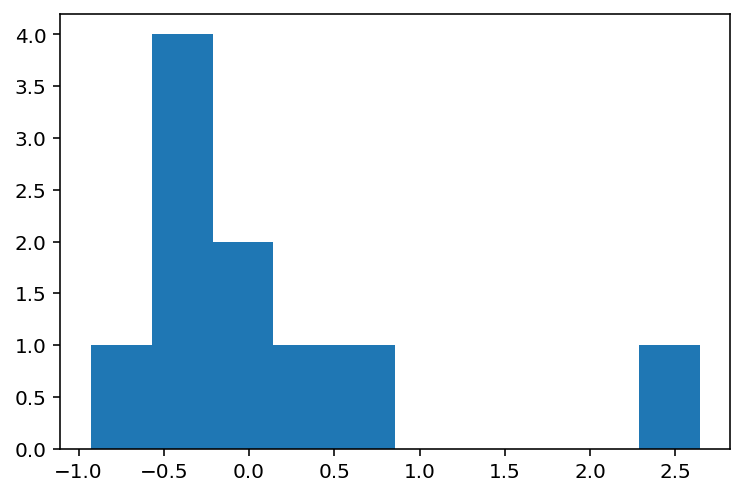

In [21]:
plt.hist(X_st[:,1]);

# SGD

![img/lr_gradient_descent.gif](img/lr_gradient_descent.gif)

Как нейронные сети обучаются с помощью градиентного спуска:  
https://www.youtube.com/watch?v=IHZwWFHWa-w

In [22]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [23]:
def eval_model(X, y, iterations, alpha=1e-4):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    for i in range(1, iterations+1):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        W -= (alpha * (1/n * 2 * np.dot((y_pred - y), X)))
        if i % (iterations / 10) == 0:
            print(f'# итерация: {i}, MSE: {err}, веса: {W}')
    return W

In [24]:
eval_model(X_st, y, iterations=1000, alpha=1e-2)

# итерация: 100, MSE: 100.45461792349458, веса: [49.82014907  4.28163224  3.78433559  3.53148368]
# итерация: 200, MSE: 41.419307080430414, веса: [56.39476354  4.6232756   3.41113988  3.60725583]
# итерация: 300, MSE: 40.20452556742015, веса: [57.26668599  4.89099451  3.08741518  3.66745142]
# итерация: 400, MSE: 40.06122683534027, веса: [57.38231995  5.10948949  2.81625166  3.72354305]
# итерация: 500, MSE: 39.97432854651119, веса: [57.39765528  5.28815499  2.58921203  3.77480121]
# итерация: 600, MSE: 39.91432926259703, веса: [57.39968904  5.43449444  2.39916596  3.82093572]
# итерация: 700, MSE: 39.87270920258028, веса: [57.39995876  5.55454352  2.24012295  3.86197182]
# итерация: 800, MSE: 39.84380834593673, веса: [57.39999453  5.65316904  2.10705327  3.89813244]
# итерация: 900, MSE: 39.82372394459456, веса: [57.39999927  5.73430441  1.99573625  3.92975582]
# итерация: 1000, MSE: 39.809757514694304, веса: [57.3999999   5.80113578  1.90263183  3.95723913]


array([57.3999999 ,  5.80113578,  1.90263183,  3.95723913])

In [25]:
def eval_sgd_model(X, y, iterations, qty_in_batch, alpha=1e-4):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    n_batch = n // qty_in_batch
    if n % qty_in_batch != 0:
        n_batch += 1
    for i in range(1, iterations+1):
        for b in range(n_batch):
            start_ = qty_in_batch*b
            end_ = qty_in_batch*(b+1)
            X_tmp = X[start_ : end_, :]
            y_tmp = y[start_ : end_]
            y_pred_tmp = np.dot(X_tmp, W)
            err = calc_mse(y_tmp, y_pred_tmp)
            W -= (alpha * (1/n * 2 * np.dot((y_pred_tmp - y_tmp), X_tmp)))
        if i % (iterations / 10) == 0:
            print(f'# итерация: {i}, MSE: {err}, веса: {W}')
    return W

In [26]:
eval_sgd_model(X_st, y, iterations=5000, qty_in_batch=5, alpha=1e-2)

# итерация: 500, MSE: 41.04375069719782, веса: [57.39665569  5.03353755  2.63495978  4.01188302]
# итерация: 1000, MSE: 39.53136656008915, веса: [57.39825609  5.7476026   1.92155066  4.01645062]
# итерация: 1500, MSE: 38.82597895057832, веса: [57.39796774  5.99610087  1.62588877  4.06617883]
# итерация: 2000, MSE: 38.51118773187366, веса: [57.39785907  6.08689979  1.50441993  4.09799502]
# итерация: 2500, MSE: 38.37577730437202, веса: [57.39781701  6.12130185  1.45476967  4.11373401]
# итерация: 3000, MSE: 38.31887485953611, веса: [57.39780044  6.13466691  1.43453608  4.12080791]
# итерация: 3500, MSE: 38.295297590463406, веса: [57.39779384  6.1399453   1.42630514  4.1238453 ]
# итерация: 4000, MSE: 38.28561043060462, веса: [57.39779119  6.14205182  1.42296039  4.12511833]
# итерация: 4500, MSE: 38.28165031218245, веса: [57.39779012  6.14289795  1.42160207  4.12564472]
# итерация: 5000, MSE: 38.28003630249164, веса: [57.39778969  6.14323918  1.42105066  4.12586069]


array([57.39778969,  6.14323918,  1.42105066,  4.12586069])

### Регуляризация  

По сути, регуляризация - это ограничение модели.  
Для нас это, прежде всего, способ уменьшить сложность модели, чтобы предотвратить переобучение.
Проблема: признаки могут иметь линейную (или почти линейную) зависимость.  
Если у нас есть такие признаки, модель будет не устойчива к изменению в данных (большой variance).  
Чтобы побороть этот эффект, модель при обучении дополнительно ограничивают, используя **регуляризацию**.

Подробнее здесь:  
https://habr.com/ru/company/ods/blog/323890/  
и здесь:  
https://habr.com/ru/company/ods/blog/322076/  

L1 регуляризация

$$\Large \mathcal{L}_{reg} \left(X, \vec{y}, \vec{w}\right) = \mathcal{L}\left(X, \vec{y}, \vec{w}\right)  + \lambda \sum_{j=1}^m \left| w_j \right|$$

L2 регуляризация

$$\Large \mathcal{L}_{reg} \left(X, \vec{y}, \vec{w}\right) = \mathcal{L}\left(X, \vec{y}, \vec{w}\right) + \lambda \frac{1}{2} \sum_{j=1}^m w_j^2$$

In [27]:
def eval_model_reg2(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    for i in range(1, iterations+1):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X) + lambda_ * W) 
        if i % (iterations / 10) == 0:
            print(f'# итерация: {i}, MSE: {err}, веса: {W}')
    return W

In [32]:
eval_model_reg2(X_st, y, iterations=5000, alpha=1e-2, lambda_=1e-4)

# итерация: 500, MSE: 39.98166412253416, веса: [57.39479705  5.10767868  2.46037345  4.08674902]
# итерация: 1000, MSE: 39.80723120406398, веса: [57.39713005  5.765859    1.85689028  4.03893236]
# итерация: 1500, MSE: 39.782405042800356, веса: [57.39713014  5.99060723  1.60529698  4.06885866]
# итерация: 2000, MSE: 39.77852356578891, веса: [57.39713014  6.07152025  1.50155606  4.09300748]
# итерация: 2500, MSE: 39.77788748617127, веса: [57.39713014  6.10185559  1.45905205  4.10572941]
# итерация: 3000, MSE: 39.777779304702605, веса: [57.39713014  6.11355928  1.44170275  4.11160375]
# итерация: 3500, MSE: 39.77775983405892, веса: [57.39713014  6.11816175  1.43463681  4.11416107]
# итерация: 4000, MSE: 39.77775594321603, веса: [57.39713014  6.11999396  1.43176283  4.1152412 ]
# итерация: 4500, MSE: 39.77775502451415, веса: [57.39713014  6.12072893  1.43059479  4.11568989]
# итерация: 5000, MSE: 39.777754760507705, веса: [57.39713014  6.12102515  1.4301203   4.11587451]


### Домашнее задание:  
1. Постройте график зависимости весов всех признаков от lambda в L2-регуляризации (на данных из урока).
2. Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?  
3. Напишите функцию наподобие eval_model_reg2, но для применения L1-регуляризации *.

In [47]:
w1 = eval_model_reg2(X_st, y, iterations=5000, alpha=1e-2, lambda_=1e-4)
w2 = eval_model_reg2(X_st, y, iterations=5000, alpha=1e-2, lambda_=1e-2)
w3 = eval_model_reg2(X_st, y, iterations=5000, alpha=1e-2, lambda_=1e-1)
w4 = eval_model_reg2(X_st, y, iterations=5000, alpha=1e-2, lambda_=5e-2)
w5 = eval_model_reg2(X_st, y, iterations=5000, alpha=1e-2, lambda_=5e-6)


# итерация: 500, MSE: 39.98166412253416, веса: [57.39479705  5.10767868  2.46037345  4.08674902]
# итерация: 1000, MSE: 39.80723120406398, веса: [57.39713005  5.765859    1.85689028  4.03893236]
# итерация: 1500, MSE: 39.782405042800356, веса: [57.39713014  5.99060723  1.60529698  4.06885866]
# итерация: 2000, MSE: 39.77852356578891, веса: [57.39713014  6.07152025  1.50155606  4.09300748]
# итерация: 2500, MSE: 39.77788748617127, веса: [57.39713014  6.10185559  1.45905205  4.10572941]
# итерация: 3000, MSE: 39.777779304702605, веса: [57.39713014  6.11355928  1.44170275  4.11160375]
# итерация: 3500, MSE: 39.77775983405892, веса: [57.39713014  6.11816175  1.43463681  4.11416107]
# итерация: 4000, MSE: 39.77775594321603, веса: [57.39713014  6.11999396  1.43176283  4.1152412 ]
# итерация: 4500, MSE: 39.77775502451415, веса: [57.39713014  6.12072893  1.43059479  4.11568989]
# итерация: 5000, MSE: 39.777754760507705, веса: [57.39713014  6.12102515  1.4301203   4.11587451]
# итерация: 500, M

In [30]:
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format='retina'
import warnings
warnings.simplefilter('ignore')

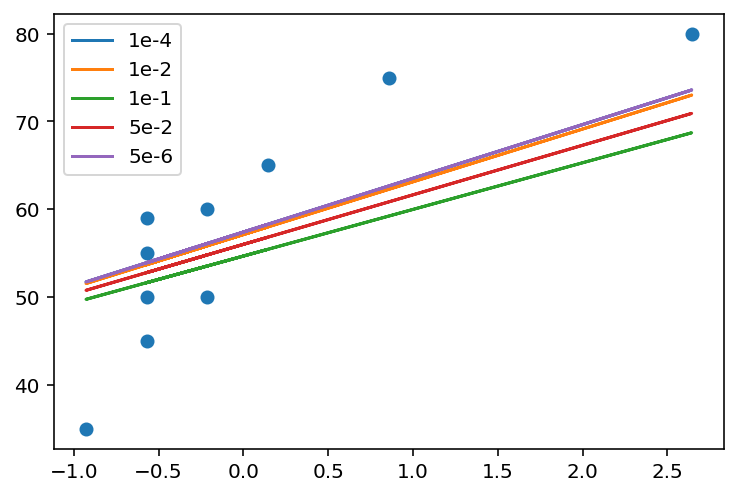

In [48]:
# 1) Постройте график зависимости весов всех признаков от lambda в L2-регуляризации (на данных из урока).
plt.scatter(X_st[:,1], y)
plt.plot(X_st[:,1], w1[0] + w1[1] * X_st[:,1], label='1e-4')
plt.plot(X_st[:,1], w2[0] + w2[1] * X_st[:,1], label='1e-2')
plt.plot(X_st[:,1], w3[0] + w3[1] * X_st[:,1], label='1e-1')
plt.plot(X_st[:,1], w4[0] + w4[1] * X_st[:,1], label='5e-2')
plt.plot(X_st[:,1], w5[0] + w5[1] * X_st[:,1], label='5e-6')

plt.legend();

In [49]:
# 3.Напишите функцию наподобие eval_model_reg2, но для применения L1-регуляризации *.

In [57]:
def eval_model_reg1(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    for i in range(1, iterations+1):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X) + lambda_ * W / np.absolute(W) ) 
        if i % (iterations / 10) == 0:
            print(f'# итерация: {i}, MSE: {err}, веса: {W}')
    return W

In [59]:
wr1 = eval_model_reg1(X_st, y, iterations=5000, alpha=1e-2, lambda_=1e-4)
wr2 = eval_model_reg2(X_st, y, iterations=5000, alpha=1e-2, lambda_=1e-4)


# итерация: 500, MSE: 39.98154926927971, веса: [57.3976156   5.1079242   2.46011903  4.08691798]
# итерация: 1000, MSE: 39.80712300604174, веса: [57.3999499   5.76651203  1.85620907  4.03912572]
# итерация: 1500, MSE: 39.78234087113101, веса: [57.39995     5.99151699  1.60431305  4.06910179]
# итерация: 2000, MSE: 39.778489156156404, веса: [57.39995     6.07256443  1.50039558  4.09329499]
# итерация: 2500, MSE: 39.777867762373674, веса: [57.39995     6.10296578  1.45779797  4.10604572]
# итерация: 3000, MSE: 39.7777660764615, веса: [57.39995     6.11470092  1.44040178  4.11193613]
# итерация: 3500, MSE: 39.77774934650397, веса: [57.39995    6.1193181  1.4333132  4.1145017]
# итерация: 4000, MSE: 39.77774658745512, веса: [57.39995     6.12115708  1.43042856  4.11558584]
# итерация: 4500, MSE: 39.77774613157809, веса: [57.39995     6.12189515  1.42925561  4.11603642]
# итерация: 5000, MSE: 39.777746056009406, веса: [57.39995     6.12219276  1.42877888  4.11622191]
# итерация: 500, MSE: 3

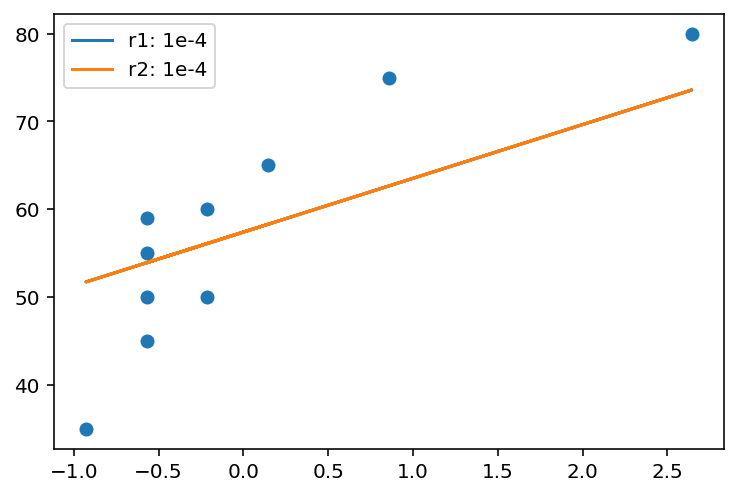

In [60]:
plt.scatter(X_st[:,1], y)
plt.plot(X_st[:,1], wr1[0] + wr1[1] * X_st[:,1], label='r1: 1e-4')
plt.plot(X_st[:,1], wr2[0] + wr2[1] * X_st[:,1], label='r2: 1e-4')

plt.legend();